# **Loading Libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Loading Data**

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

ID_Patient_Care_Situation  Diagnosed_Condition  Patient_ID  \
0                      22374                    8        3333   
1                      18164                    5        5740   
2                       6283                   23       10446   
3                       5339                   51       12011   
4                      33012                    0       12513   

  Treated_with_drugs  Patient_Age  Patient_Body_Mass_Index Patient_Smoker  \
0                DX6           56                18.479385            YES   
1               DX2            36                22.945566            YES   
2                DX6           48                27.510027            YES   
3               DX1             5                19.130976             NO   
4                NaN          128                 1.348400     Cannot say   

  Patient_Rural_Urban Patient_mental_condition    A    B    C    D    E    F  \
0               URBAN                   Stable  1.0  0.0  0.0  0.0  1.0  0.0   
1               RURAL                   Stable  1.0  0.0  0.0  0.0  0.0  0.0   
2               RURAL                   Stable  1.0  0.0  0.0  0.0  0.0  0.0   
3               URBAN                   Stable  1.0  0.0  0.0  0.0  0.0  0.0   
4               RURAL                   Stable  0.0  0.0  0.0  0.0  0.0  0.0   

     Z  Number_of_prev_cond  Survived_1_year  
0  0.0                  2.0                0  
1  0.0                  1.0                1  
2  0.0                  1.0                0  
3  0.0                  1.0                1  
4  1.0                  1.0                1

In [ ]:
pharma_data.rename(columns = {
    'ID_Patient_Care_Situation': 'Care_situation',
    'Patient_ID':'ID', 
    'Treated_with_drugs':'Drugs',
    'Patient_Age':'Age',
    'Patient_Body_Mass_Index': 'BMI',
    'Patient_Smoker': 'Smoker',
    'Patient_Rural_Urban': 'Region',
    'Patient_mental_condition': 'Mental_condition',
    'Number_of_prev_cond': 'Prev_cond',
    'Survived_1_year': 'Survived'},
     inplace = True)

In [ ]:
pharma_data.tail()

Care_situation  Diagnosed_Condition    ID     Drugs  Age        BMI  \
23092           15613                    3  1548  DX2 DX4    14  18.643448   
23093           15503                   41  2769       DX6   55  23.684585   
23094            2167                   24  7671       DX6   63  27.500039   
23095           31646                   11  5764      DX3    25  23.719125   
23096            3947                   21  6266       DX6   50  18.391156   

      Smoker Region Mental_condition    A    B    C    D    E    F    Z  \
23092     NO  RURAL           Stable  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
23093     NO  RURAL           Stable  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
23094    YES  RURAL           Stable  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
23095    YES  RURAL           Stable  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
23096    YES  RURAL           Stable  1.0  0.0  1.0  1.0  1.0  0.0  0.0   

       Prev_cond  Survived  
23092        5.0         0  
23093        1.0         1  
23094        1.0         0  
23095        2.0         1  
23096        4.0         0

## **Exploratory Data Analysis (EDA)**

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Care_situation       23097 non-null  int64  
 1   Diagnosed_Condition  23097 non-null  int64  
 2   ID                   23097 non-null  int64  
 3   Drugs                23084 non-null  object 
 4   Age                  23097 non-null  int64  
 5   BMI                  23097 non-null  float64
 6   Smoker               23097 non-null  object 
 7   Region               23097 non-null  object 
 8   Mental_condition     23097 non-null  object 
 9   A                    21862 non-null  float64
 10  B                    21862 non-null  float64
 11  C                    21862 non-null  float64
 12  D                    21862 non-null  float64
 13  E                    21862 non-null  float64
 14  F                    21862 non-null  float64
 15  Z                    21862 non-null 

In [ ]:
pharma_data.describe()

Care_situation  Diagnosed_Condition            ID           Age  \
count    23097.000000         23097.000000  23097.000000  23097.000000   
mean     16545.712041            26.413127   6261.280772     33.209768   
std       9532.263503            15.030865   3595.990620     19.549882   
min          2.000000             0.000000      1.000000      0.000000   
25%       8280.000000            13.000000   3181.000000     16.000000   
50%      16597.000000            26.000000   6242.000000     33.000000   
75%      24825.000000            39.000000   9363.000000     50.000000   
max      33014.000000            52.000000  12515.000000    149.000000   

                BMI             A             B             C             D  \
count  23097.000000  21862.000000  21862.000000  21862.000000  21862.000000   
mean      23.454820      0.897905      0.136355      0.185070      0.083615   
std        3.807661      0.302780      0.343173      0.388363      0.276817   
min        1.089300      0.000000      0.000000      0.000000      0.000000   
25%       20.205550      1.000000      0.000000      0.000000      0.000000   
50%       23.386199      1.000000      0.000000      0.000000      0.000000   
75%       26.788154      1.000000      0.000000      0.000000      0.000000   
max       29.999579      1.000000      1.000000      1.000000      1.000000   

                  E             F             Z     Prev_cond      Survived  
count  21862.000000  21862.000000  21862.000000  21862.000000  23097.000000  
mean       0.393239      0.053700      0.000595      1.750480      0.632247  
std        0.488480      0.225431      0.024379      0.770311      0.482204  
min        0.000000      0.000000      0.000000      1.000000      0.000000  
25%        0.000000      0.000000      0.000000      1.000000      0.000000  
50%        0.000000      0.000000      0.000000      2.000000      1.000000  
75%        1.000000      0.000000      0.000000      2.000000      1.000000  
max        1.000000      1.000000      1.000000      5.000000      1.000000

In [ ]:
pharma_data.isnull().sum()

Care_situation            0
Diagnosed_Condition       0
ID                        0
Drugs                    13
Age                       0
BMI                       0
Smoker                    0
Region                    0
Mental_condition          0
A                      1235
B                      1235
C                      1235
D                      1235
E                      1235
F                      1235
Z                      1235
Prev_cond              1235
Survived                  0
dtype: int64

In [ ]:
pharma_data["Survived"].value_counts()

1    14603
0     8494
Name: Survived, dtype: int64

In [ ]:
pharma_data["Mental_condition"].value_counts()

Stable    23097
Name: Mental_condition, dtype: int64

In [ ]:
pharma_data["Region"].value_counts()

RURAL    16134
URBAN     6963
Name: Region, dtype: int64

In [ ]:
pharma_data["Smoker"].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Smoker, dtype: int64

In [ ]:
pharma_data["Age"].value_counts()

31     401
19     395
64     394
36     393
0      392
      ... 
128      1
138      1
125      1
115      1
121      1
Name: Age, Length: 78, dtype: int64

In [ ]:
pharma_data["Diagnosed_Condition"].value_counts()

11    489
12    483
49    479
7     471
43    469
52    469
18    468
36    466
17    461
40    460
8     460
1     459
34    458
24    458
19    456
45    455
21    454
5     454
29    452
46    448
35    447
41    447
51    444
4     443
30    443
23    443
31    443
33    443
6     443
39    442
3     442
16    440
20    439
9     438
15    436
13    436
22    436
27    434
44    432
25    429
28    426
37    425
32    425
42    423
47    422
26    421
48    418
2     417
10    416
38    413
14    408
50    401
0      13
Name: Diagnosed_Condition, dtype: int64

In [ ]:
pharma_data["Drugs"].value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Drugs, dtype: int64

In [ ]:
print('% of smoker survived', 100*np.mean(pharma_data['Survived'][pharma_data['Smoker'] == 'YES']))
print('% of non-smoker survived', 100*np.mean(pharma_data['Survived'][pharma_data['Smoker'] == 'NO']))

% of smoker survived 49.02419190892458
% of non-smoker survived 73.7354673108863


In [ ]:
print('% of Rural people survived', 100*np.mean(pharma_data['Survived'][pharma_data['Region'] == "RURAL"]))
print('% of Urban people survived', 100*np.mean(pharma_data['Survived'][pharma_data['Region'] == 'URBAN']))

% of Rural people survived 66.79682657741417
% of Urban people survived 54.94758006606348


In [ ]:
print('% of Young People survived', 100*np.mean(pharma_data['Survived'][pharma_data['Age'] <= 50]))
print('% of Old People survived', 100*np.mean(pharma_data['Survived'][pharma_data['Age'] > 50]))

% of Young People survived 65.606704167145
% of Old People survived 55.91189427312775


## **Data Pre-processing**

Non numeric features to numeric

In [ ]:
dummies = []

cols = ['Region', 'Smoker']
for col in cols:
    dummies.append(pd.get_dummies(pharma_data[col]))
pharma_dummies = pd.concat(dummies, axis=1)    

In [ ]:
pharma_update = pd.concat((pharma_data,pharma_dummies), axis=1)

In [ ]:
pharma_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Care_situation       23097 non-null  int64  
 1   Diagnosed_Condition  23097 non-null  int64  
 2   ID                   23097 non-null  int64  
 3   Drugs                23084 non-null  object 
 4   Age                  23097 non-null  int64  
 5   BMI                  23097 non-null  float64
 6   Smoker               23097 non-null  object 
 7   Region               23097 non-null  object 
 8   Mental_condition     23097 non-null  object 
 9   A                    21862 non-null  float64
 10  B                    21862 non-null  float64
 11  C                    21862 non-null  float64
 12  D                    21862 non-null  float64
 13  E                    21862 non-null  float64
 14  F                    21862 non-null  float64
 15  Z                    21862 non-null 

Taking Care of MIssing Values

In [ ]:
pharma_update.isnull().sum()

Care_situation            0
Diagnosed_Condition       0
ID                        0
Drugs                    13
Age                       0
BMI                       0
Smoker                    0
Region                    0
Mental_condition          0
A                      1235
B                      1235
C                      1235
D                      1235
E                      1235
F                      1235
Z                      1235
Prev_cond              1235
Survived                  0
RURAL                     0
URBAN                     0
Cannot say                0
NO                        0
YES                       0
dtype: int64

In [ ]:
pharma_update['Prev_cond'] = pharma_update['Prev_cond'].fillna(np.mean(pharma_update['Prev_cond']))
pharma_update['A'] = pharma_update['A'].fillna(np.mean(pharma_update['A']))
pharma_update['B'] = pharma_update['B'].fillna(np.mean(pharma_update['B']))
pharma_update['C'] = pharma_update['C'].fillna(np.mean(pharma_update['C']))
pharma_update['D'] = pharma_update['D'].fillna(np.mean(pharma_update['D']))
pharma_update['E'] = pharma_update['E'].fillna(np.mean(pharma_update['E']))
pharma_update['F'] = pharma_update['F'].fillna(np.mean(pharma_update['F']))
pharma_update['Z'] = pharma_update['Z'].fillna(np.mean(pharma_update['Z']))

In [ ]:
pharma_update['Drugs'].fillna(pharma_update['Drugs'].mode()[0], inplace=True)

In [ ]:
pharma_update.isnull().sum()

Care_situation         0
Diagnosed_Condition    0
ID                     0
Drugs                  0
Age                    0
BMI                    0
Smoker                 0
Region                 0
Mental_condition       0
A                      0
B                      0
C                      0
D                      0
E                      0
F                      0
Z                      0
Prev_cond              0
Survived               0
RURAL                  0
URBAN                  0
Cannot say             0
NO                     0
YES                    0
dtype: int64

In [ ]:
pharma_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Care_situation       23097 non-null  int64  
 1   Diagnosed_Condition  23097 non-null  int64  
 2   ID                   23097 non-null  int64  
 3   Drugs                23097 non-null  object 
 4   Age                  23097 non-null  int64  
 5   BMI                  23097 non-null  float64
 6   Smoker               23097 non-null  object 
 7   Region               23097 non-null  object 
 8   Mental_condition     23097 non-null  object 
 9   A                    23097 non-null  float64
 10  B                    23097 non-null  float64
 11  C                    23097 non-null  float64
 12  D                    23097 non-null  float64
 13  E                    23097 non-null  float64
 14  F                    23097 non-null  float64
 15  Z                    23097 non-null 

In [ ]:
pharma_update.columns

Index(['Care_situation', 'Diagnosed_Condition', 'ID', 'Drugs', 'Age', 'BMI',
       'Smoker', 'Region', 'Mental_condition', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Prev_cond', 'Survived', 'RURAL', 'URBAN', 'Cannot say', 'NO',
       'YES'],
      dtype='object')

## **Omit irrelevant columns**

"Mental_condition" have only one value - "Stable". Hence it does not have any impact on the result. "ID" doesn't make any contribution on the survival of a patient. We have make dummies of the columns "Region" and "Smoker". There values are already stored in the dataset. 

In [ ]:
pharma_final = pharma_update[['Care_situation', 'Diagnosed_Condition', 'Drugs', 'Age', 'BMI',
         'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Prev_cond', 'Survived', 'RURAL', 'URBAN', 'NO',
       'YES']]

In [ ]:
pharma_final.head()

Care_situation  Diagnosed_Condition Drugs  Age        BMI    A    B    C  \
0           22374                    8   DX6   56  18.479385  1.0  0.0  0.0   
1           18164                    5  DX2    36  22.945566  1.0  0.0  0.0   
2            6283                   23   DX6   48  27.510027  1.0  0.0  0.0   
3            5339                   51  DX1     5  19.130976  1.0  0.0  0.0   
4           33012                    0   DX6  128   1.348400  0.0  0.0  0.0   

     D    E    F    Z  Prev_cond  Survived  RURAL  URBAN  NO  YES  
0  0.0  1.0  0.0  0.0        2.0         0      0      1   0    1  
1  0.0  0.0  0.0  0.0        1.0         1      1      0   0    1  
2  0.0  0.0  0.0  0.0        1.0         0      1      0   0    1  
3  0.0  0.0  0.0  0.0        1.0         1      0      1   1    0  
4  0.0  0.0  0.0  1.0        1.0         1      1      0   0    0

# **One hot encoding : To make all variables numeric to feed to machine learning process further**

In [ ]:
pharma_dummy = pd.get_dummies(pharma_final, prefix_sep='_', drop_first=True)

In [ ]:
pharma_dummy.head()

Care_situation  Diagnosed_Condition  Age        BMI    A    B    C    D  \
0           22374                    8   56  18.479385  1.0  0.0  0.0  0.0   
1           18164                    5   36  22.945566  1.0  0.0  0.0  0.0   
2            6283                   23   48  27.510027  1.0  0.0  0.0  0.0   
3            5339                   51    5  19.130976  1.0  0.0  0.0  0.0   
4           33012                    0  128   1.348400  0.0  0.0  0.0  0.0   

     E    F  ...  Drugs_DX2 DX4 DX5   Drugs_DX2 DX5   Drugs_DX3   \
0  1.0  0.0  ...                   0               0           0   
1  0.0  0.0  ...                   0               0           0   
2  0.0  0.0  ...                   0               0           0   
3  0.0  0.0  ...                   0               0           0   
4  0.0  0.0  ...                   0               0           0   

   Drugs_DX3 DX4   Drugs_DX3 DX4 DX5   Drugs_DX3 DX5   Drugs_DX4   \
0               0                   0               0           0   
1               0                   0               0           0   
2               0                   0               0           0   
3               0                   0               0           0   
4               0                   0               0           0   

   Drugs_DX4 DX5   Drugs_DX5   Drugs_DX6  
0               0           0          1  
1               0           0          0  
2               0           0          1  
3               0           0          0  
4               0           0          1  

[5 rows x 48 columns]

In [ ]:
pharma_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Care_situation              23097 non-null  int64  
 1   Diagnosed_Condition         23097 non-null  int64  
 2   Age                         23097 non-null  int64  
 3   BMI                         23097 non-null  float64
 4   A                           23097 non-null  float64
 5   B                           23097 non-null  float64
 6   C                           23097 non-null  float64
 7   D                           23097 non-null  float64
 8   E                           23097 non-null  float64
 9   F                           23097 non-null  float64
 10  Z                           23097 non-null  float64
 11  Prev_cond                   23097 non-null  float64
 12  Survived                    23097 non-null  int64  
 13  RURAL                       230

# **Separating input variables (X) and target variable (y)**

In [ ]:
X = pharma_dummy.drop("Survived", axis = 1)
y = pharma_dummy["Survived"]

X now has the train data without the "Survived" column (this is acheived with the "drop" function). Y, on the other hand, has only the "Survived" column.

# **Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **Building ML Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# **Evaluate the model**

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy: ', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy: ', accuracy_score(y_test, model.predict(X_test)))

Training accuracy:  1.0
Test accuracy:  0.7725108225108225


The difference between Training Accuracy and Testing accuracy is huge. That means our model overfits.

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True) 

In [ ]:
graph1=graphviz.Source(dot_data)

In [ ]:
graph1

It creates a very complex model.

# **Improve the model**

By limiting the depth of Decission Tree we can reduce overfitting.

In [ ]:
model_improved = DecisionTreeClassifier(max_depth = 5)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
print('Train score: ' , accuracy_score(y_train, model_improved.predict(X_train)))
print('Test score: ', accuracy_score(y_test, model_improved.predict(X_test)))

Train score:  0.777669535097689
Test score:  0.7753246753246753


In [ ]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True) 

In [ ]:
graph2=graphviz.Source(dot_data)

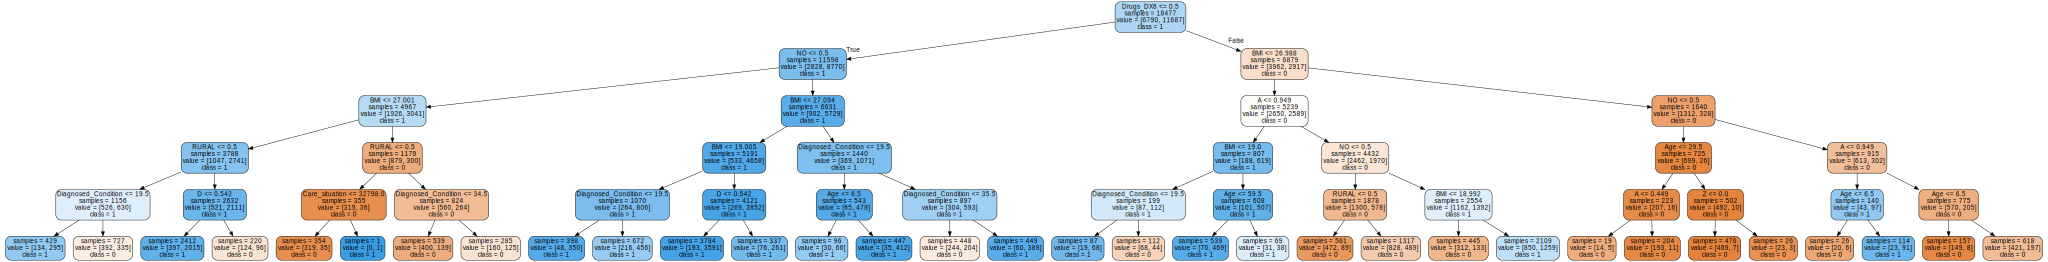

In [ ]:
graph2

# **Apply on Test Data**

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
test_data.head()

ID_Patient_Care_Situation  Diagnosed_Condition  Patient_ID  \
0                      19150                   40        3709   
1                      23216                   52         986   
2                      11890                   50       11821   
3                       7149                   32        3292   
4                      22845                   20        9959   

  Treated_with_drugs  Patient_Age  Patient_Body_Mass_Index Patient_Smoker  \
0               DX3            16                29.443894             NO   
1                DX6           24                26.836321             NO   
2           DX4 DX5            63                25.523280             NO   
3                DX6           42                27.171155             NO   
4               DX3            50                25.556192             NO   

  Patient_Rural_Urban Patient_mental_condition    A    B    C    D    E    F  \
0               RURAL                   Stable  1.0  0.0  0.0  0.0  1.0  0.0   
1               URBAN                   Stable  1.0  1.0  0.0  0.0  0.0  0.0   
2               RURAL                   Stable  1.0  0.0  0.0  0.0  1.0  0.0   
3               URBAN                   Stable  1.0  0.0  1.0  0.0  1.0  0.0   
4               RURAL                   Stable  1.0  0.0  0.0  0.0  0.0  0.0   

     Z  Number_of_prev_cond  
0  0.0                  2.0  
1  0.0                  2.0  
2  0.0                  2.0  
3  0.0                  3.0  
4  0.0                  1.0

In [ ]:
test_data.rename(columns = {
    'ID_Patient_Care_Situation': 'Care_situation',
    'Patient_ID':'ID', 
    'Treated_with_drugs':'Drugs',
    'Patient_Age':'Age',
    'Patient_Body_Mass_Index': 'BMI',
    'Patient_Smoker': 'Smoker',
    'Patient_Rural_Urban': 'Region',
    'Patient_mental_condition': 'Mental_condition',
    'Number_of_prev_cond': 'Prev_cond',
    'Survived_1_year': 'Survived'},
     inplace = True)

In [ ]:
test_data.tail()

Care_situation  Diagnosed_Condition     ID             Drugs  Age  \
9298           18245                   11   9299               DX6   28   
9299           15598                    7   6273              DX1     4   
9300           11885                   16  11473  DX1 DX3 DX4 DX5    20   
9301           25101                   50   5681              DX4    33   
9302           18855                   51  10414               DX6   52   

            BMI Smoker Region Mental_condition    A    B    C    D    E    F  \
9298  29.106314     NO  RURAL           Stable  1.0  1.0  1.0  0.0  0.0  0.0   
9299  20.616673     NO  URBAN           Stable  1.0  1.0  0.0  0.0  0.0  0.0   
9300  24.727357    YES  URBAN           Stable  1.0  0.0  0.0  0.0  0.0  0.0   
9301  17.517426     NO  URBAN           Stable  1.0  1.0  1.0  1.0  0.0  1.0   
9302  17.781011    YES  RURAL           Stable  1.0  0.0  0.0  0.0  0.0  0.0   

        Z  Prev_cond  
9298  0.0        3.0  
9299  0.0        2.0  
9300  0.0        1.0  
9301  0.0        5.0  
9302  0.0        1.0

In [ ]:
dummies = []

cols = ['Region', 'Smoker']
for col in cols:
    dummies.append(pd.get_dummies(test_data[col]))
test_dummies = pd.concat(dummies, axis=1)  

In [ ]:
test_update = pd.concat((test_data,test_dummies), axis=1)

In [ ]:
test_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Care_situation       9303 non-null   int64  
 1   Diagnosed_Condition  9303 non-null   int64  
 2   ID                   9303 non-null   int64  
 3   Drugs                9303 non-null   object 
 4   Age                  9303 non-null   int64  
 5   BMI                  9303 non-null   float64
 6   Smoker               9303 non-null   object 
 7   Region               9303 non-null   object 
 8   Mental_condition     9303 non-null   object 
 9   A                    9303 non-null   float64
 10  B                    9303 non-null   float64
 11  C                    9303 non-null   float64
 12  D                    9303 non-null   float64
 13  E                    9303 non-null   float64
 14  F                    9303 non-null   float64
 15  Z                    9303 non-null   f

In [ ]:
test_update.isnull().sum()

Care_situation         0
Diagnosed_Condition    0
ID                     0
Drugs                  0
Age                    0
BMI                    0
Smoker                 0
Region                 0
Mental_condition       0
A                      0
B                      0
C                      0
D                      0
E                      0
F                      0
Z                      0
Prev_cond              0
RURAL                  0
URBAN                  0
NO                     0
YES                    0
dtype: int64

In [ ]:
test_final = test_update[['Care_situation', 'Diagnosed_Condition', 'Drugs', 'Age', 'BMI',
         'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Prev_cond', 'RURAL', 'URBAN', 'NO',
       'YES']]

In [ ]:
test_final.head()

Care_situation  Diagnosed_Condition     Drugs  Age        BMI    A    B  \
0           19150                   40      DX3    16  29.443894  1.0  0.0   
1           23216                   52       DX6   24  26.836321  1.0  1.0   
2           11890                   50  DX4 DX5    63  25.523280  1.0  0.0   
3            7149                   32       DX6   42  27.171155  1.0  0.0   
4           22845                   20      DX3    50  25.556192  1.0  0.0   

     C    D    E    F    Z  Prev_cond  RURAL  URBAN  NO  YES  
0  0.0  0.0  1.0  0.0  0.0        2.0      1      0   1    0  
1  0.0  0.0  0.0  0.0  0.0        2.0      0      1   1    0  
2  0.0  0.0  1.0  0.0  0.0        2.0      1      0   1    0  
3  1.0  0.0  1.0  0.0  0.0        3.0      0      1   1    0  
4  0.0  0.0  0.0  0.0  0.0        1.0      1      0   1    0

In [ ]:
test_dummy = pd.get_dummies(test_final, prefix_sep='_', drop_first=True)

In [ ]:
ytest_dt = model.predict(test_dummy)

In [ ]:
ytest_dt

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
ytest_dt[30:35]

array([1, 0, 0, 1, 1])

In [ ]:
prediction = pd.DataFrame(ytest_dt, columns=['predictions']).to_csv('prediction.csv')

In [ ]:
res = pd.DataFrame(ytest_dt)
#res.index = test_dummy.index
#res.index = test_dummy["id"]
res.columns = ["prediction"]
from google.colab import files 
res.to_csv('prediction_result.csv', index = False)
files.download('prediction_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>